In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
import random
from api_keys import geoapify_key
from sklearn import linear_model

In [2]:
# Read the csv data file as data_df
data_df = pd.read_csv("data/Billionaires Statistics Dataset.csv")
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# Clean Data

In [3]:
# Convert gdp_country to float
data_df['gdp_country']= data_df['gdp_country'].replace('[\$,]', '', regex=True).astype(float)
# Convert units of measurements
data_df['finalWorth'] = round(data_df['finalWorth']/1000,1)
data_df['gdp_country'] = round(data_df['gdp_country']/1000000000,1)
data_df['population_country'] = round(data_df['population_country']/1000000,1)
data_df['age'] = round(data_df['age'])
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.5,65.6,102.5,82.5,24.2,60.7,67.1,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891


In [4]:
# Checking rows that contain nan value
data_df[data_df.isna().any(axis=1)]
data_df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [5]:
# Selecting features that are needed
full_df = data_df[['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
    'source', 'industries', 'countryOfCitizenship','selfMade', 'status', 'gender', 'lastName', 'firstName',
       'cpi_country', 
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']]
full_df.columns = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
    'source', 'industries', 'countryOfCitizenship','selfMade', 'status', 'gender', 'lastName', 'firstName',
       'cpi_country', 'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']

#Checking null cells
full_df[full_df.isna().any(axis=1)]
full_df.isnull().sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                            65
country                                        38
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
lastName                                        0
firstName                                       3
cpi_country                                   184
gdp_country                                   164
gross_tertiary_education_enrollment           182
gross_primary_education_enrollment_country    181
life_expectancy_country                       182
tax_revenue_country                           183


In [6]:
# Fill in missing age with median age
agedata = full_df.notna()
agedata = full_df[agedata]
median_age = agedata["age"].median()
median_age
full_df['age'] = full_df['age'].fillna(value = median_age)

In [7]:
# Fill in null country with country of citizenship
full_df['country'].fillna(full_df['countryOfCitizenship'], inplace=True)

In [8]:
# Fill in null cpi_country with real-time value
for index, row in full_df.iterrows():
    if(row["country"]=='Hong Kong'):
        full_df.at[index, "cpi_country"] = 105.3
    if(row["country"]=='Uzbekistan'):
        full_df.at[index, "cpi_country"] = 209.90 
    if(row["country"]=='Taiwan'):
        full_df.at[index, "cpi_country"] = 105.63
    if(row["country"]=='Eswatini (Swaziland)'):
        full_df.at[index, "cpi_country"] = 174.42
    if(row["country"]=='Bahamas'):
        full_df.at[index, "cpi_country"] = 121.79
    if(row["country"]=='Cayman Islands'):
        full_df.at[index, "cpi_country"] = 130.6
    if(row["country"]=='Bermuda'):
        full_df.at[index, "cpi_country"] = 105.3
    if(row["country"]=='Ireland'):
        full_df.at[index, "cpi_country"] = 121.1
    if(row["country"]=='Liechtenstein'):
        full_df.at[index, "cpi_country"] = 91.8
    if(row["country"]=='Andorra'):
        full_df.at[index, "cpi_country"] = 112.92
    if(row["country"]=='Monaco'):
        full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='Guernsey'):
#         full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='British Virgin Islands'):
#         full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='Turks and Caicos Island'):
#         full_df.at[index, "cpi_country"] = 122.1

In [9]:
# Find the missing values for gdp_country
missing_gdp = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
                'gdp': [372.8, 3845.6, 761.7, 4.9, 2611.0, 12.7, 5.9, 2827.1, 7.6, 1.1, 1414.2, 579.1, 533.6, 
                        1862, 0.004, 2778.1, 1.1, 295.6, 21427.7, 2029.0, 226.8, 364.7, 446.3, 76.5, 5081.7]}

# Fill in null gdp_country with real-time value
counter = 0
for i in missing_gdp['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gdp_country"] = missing_gdp['gdp'][counter]
    counter = counter + 1

In [10]:
# Find the missing values for gross_tertiary_education_enrollment
missing_tertiary = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Andorra', 'Malaysia',
       'Austria', 'Panama', 'Japan'],
              'gross_tertiary_education_enrollment': [50.6, 100, 70.2, 48, 6.75, 28.1, 15.1,
                    25.9, 65.8, 19.0, 39.9, 40.2, 79.7, 75.2, 61.9, 1.0, 65.6, 1.0, 64.1, 88.2,
                    94.3, 70.7, 1, 45.1, 85.1, 47.8, 63.2]
                   }
# Fill in null gross_tertiary_education_enrollment with real-time value
counter = 0
for i in missing_tertiary['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gross_tertiary_education_enrollment"] = missing_tertiary['gross_tertiary_education_enrollment'][counter]
    counter = counter + 1

In [11]:
# Find the missing values for gross_primary_education_enrollment_country
missing_primary = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
              'gross_primary_education_enrollment_country': [107.8, 130.9, 104.0, 100, 114.5, 113, 92.0, 
                                                      93.2, 101.2, 101.0, 93.5, 105.8, 103.9, 101.4,
                                                      101.9, 100, 102.5, 122.34, 100.7, 101.8,
                                                      98.1, 106.9, 105.3, 103.1, 101.5, 98.8]}

# Fill in null gross_primary_education_enrollment_country with real-time value
counter = 0
for i in missing_primary['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gross_primary_education_enrollment_country"] = missing_primary['gross_primary_education_enrollment_country'][counter]
    counter = counter + 1

In [12]:
# Find the missing values for life_expectancy_country
missing_life = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Andorra', 'Malaysia',
       'Austria', 'Panama', 'Japan'],
              'life_expectancy_country': [85.4, 89.5, 80.9, 81.0, 59.7, 69.4, 72.7, 82.2, 81.3, 
                                          82.1, 75.9, 75.0, 81.6, 82.2, 82.9, 82.9, 82.5, 75,79,
                                          78.5, 82.6, 76.5, 81.2, 76, 81.6, 76.7, 84.2]}

# Fill in null life_expectancy_country with real-time value
counter = 0
for i in missing_life['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "life_expectancy_country"] = missing_life['life_expectancy_country'][counter]
    counter = counter + 1

In [13]:
# Find the missing values for population_country
missing_population = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
              'population_country': [7.4, 83.2, 23.6, 1.2, 1366, 0.04, 0.006, 6.7, 0.006, 0.003,
                                    126, 11.6, 5.0, 59.0, 0.006, 67.3, 0.005, 1.1, 328, 51.74, 33,
                                    33, 8.9, 4.4, 125.7]}

# Fill in null population_country with real-time value
counter = 0
for i in missing_population['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "population_country"] = missing_population['population_country'][counter]
    counter = counter + 1

In [14]:
# Find the missing values for latitude_country
missing_latitude = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
                 'latitude_country': [22.396428, 51.165691, 23.69781, -26.522503, 20.593684,
                                      25.03428, 19.3133, 55.378051, 32.321384, 18.420695, 
                                      23.634501, 50.850346, 53.349805, 41.87194, 41.87194, 
                                      49.465691, 46.603354, 21.694025, 49.817492, 37.09024, 
                                      35.907757, 35.907757, -9.190347, 4.210484, 47.516231, 
                                      8.982379, 36.204824],
                 'longitude_country': [114.109497, 10.451526, 120.960515, 31.465866, 78.96288, 
                                       -77.39628, -81.2546, -3.435973, -64.750459, -64.61317, 
                                       -102.552788, 4.351721, -6.260309, 12.56738, 12.56738, 
                                       -2.293241, 1.888334, -71.797928, 15.472962, -95.712891, 
                                       -78.561083, 128.60957, -75.015152, 101.975766, 14.550072, 
                                       -80.782127]}

# Fill in null latitude_country with real-time value
counter = 0
for i in missing_latitude['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "latitude_country"] = missing_latitude['latitude_country'][counter]
            full_df.at[index, "longitude_country"] = missing_latitude['longitude_country'][counter]
    counter = counter + 1

In [15]:
# Check for completion of data cleaning
full_df[full_df.isna().any(axis=1)]
full_df.isnull().sum()       

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                             0
country                                         0
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
lastName                                        0
firstName                                       3
cpi_country                                    38
gdp_country                                     0
gross_tertiary_education_enrollment             0
gross_primary_education_enrollment_country      0
life_expectancy_country                         0
tax_revenue_country                           183


# General Informations About Billionaires Distributions

In [18]:
# Geographical distribution
# Find country coordinates via geoapify with names of countries
coord_country_df = full_df['country'].to_frame().groupby('country').sum().reset_index()

# Create Lat and Lon columns for coordinates
coord_country_df['Lat']=''
coord_country_df['Lon']=''

# Set path for requests
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

# Loop through the coord_country_df DataFrame and search coordinates for each country
for index, row in coord_country_df.iterrows():

    # Get the country's name 
    country = row["country"] 

    # Add the current city to the parameters
    params["text"] = f"{country}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()
  
    # Extract latitude and longitude
    coord_country_df.loc[index, "Lat"] = response["results"][0]["lat"]
    coord_country_df.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {country} fetched...")



Coordinates for Algeria fetched...
Coordinates for Andorra fetched...
Coordinates for Argentina fetched...
Coordinates for Armenia fetched...
Coordinates for Australia fetched...
Coordinates for Austria fetched...
Coordinates for Bahamas fetched...
Coordinates for Bahrain fetched...
Coordinates for Belgium fetched...
Coordinates for Bermuda fetched...
Coordinates for Brazil fetched...
Coordinates for British Virgin Islands fetched...
Coordinates for Cambodia fetched...
Coordinates for Canada fetched...
Coordinates for Cayman Islands fetched...
Coordinates for Chile fetched...
Coordinates for China fetched...
Coordinates for Colombia fetched...
Coordinates for Cyprus fetched...
Coordinates for Czech Republic fetched...
Coordinates for Denmark fetched...
Coordinates for Egypt fetched...
Coordinates for Eswatini (Swaziland) fetched...
Coordinates for Finland fetched...
Coordinates for France fetched...
Coordinates for Georgia fetched...
Coordinates for Germany fetched...
Coordinates for G

In [19]:
# Output country coordinates to csv file
coord_country_df.to_csv("output/country_coordinates.csv")

In [20]:
# Read coordinates of countries file from csv
coord_country_df = pd.read_csv("output/country_coordinates.csv")

# Add finalWorth column to data frame
coord_country_df['finalWorth']=''
# Reset index 
worth = full_df.groupby('country').sum().reset_index()
worth = worth[['country','finalWorth']]

# Fill in finaWorth column of coord_contry_df 
for index, row in worth.iterrows():
    coord_country_df['finalWorth']= worth['finalWorth']

# Configure the map
map_plot_1 = coord_country_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    size = 'finalWorth',
    color = 'country',
    alpha = 0.5,
    frame_width = 800,
    frame_height = 600   
)

# Display the map plot
map_plot_1
# Save the map as output
hvplot.save(map_plot_1,'world_map.html')

## Distribution of Billionaires by Country

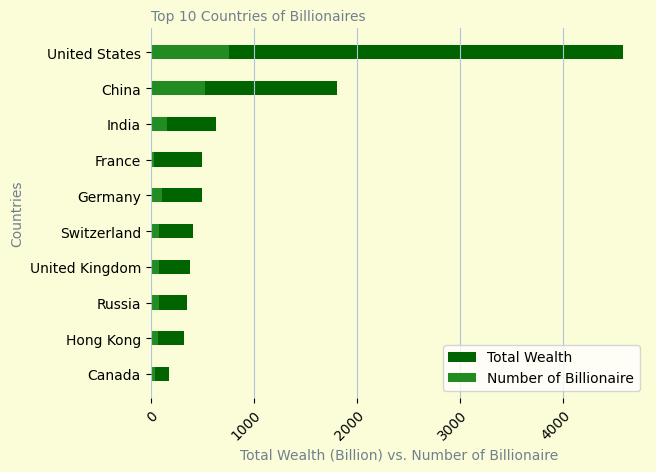

In [21]:
# Billionaires by countries --- bar chart
country_wealth_df = full_df[['finalWorth','country']].groupby('country').sum()
country_count_df = full_df[['finalWorth','country']].groupby('country').count()
country_df = pd.merge(country_wealth_df, country_count_df, on = 'country', how = 'outer', suffixes = ('_value', '_count') )
country_df = country_df.sort_values(by = 'finalWorth_value', ascending = True)

bottom_country_df = country_df.head(10)
top_country_df = country_df.tail(10)

# multi barh plot for top 10 countries
x_axis = np.arange(len(top_country_df['finalWorth_value'])) 

# Set background color of the outer
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.barh(top_country_df.index, top_country_df['finalWorth_value'], 0.4, color = 'darkgreen') 
plt.barh(top_country_df.index, top_country_df['finalWorth_count'], 0.4, color = 'forestgreen') 
  
plt.title("Top 10 Countries of Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)

plt.ylabel("Countries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.yticks
plt.legend(labels = ('Total Wealth','Number of Billionaire'))

# # annotate for total wealth
# for index, value in enumerate(top_country_df['finalWorth_value']):
#     plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'mediumblue') 
# # annotate for count
# for index, value in enumerate(top_country_df['finalWorth_count']):
#     plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'white') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

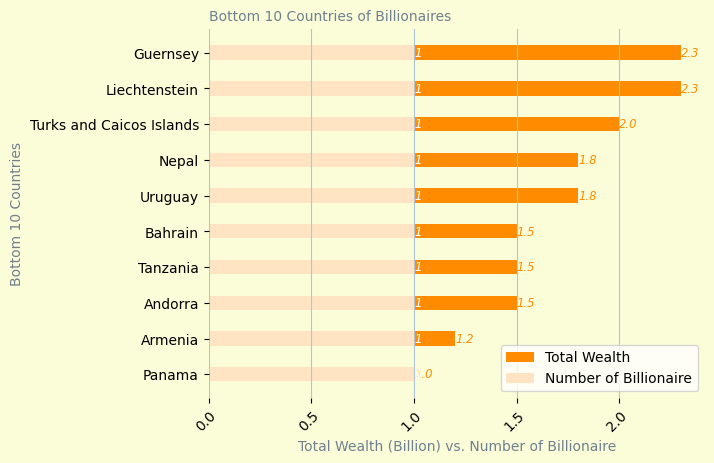

In [22]:
# multi barh plot fot bottom 10 countries
x_axis = np.arange(len(bottom_country_df['finalWorth_value'])) 

# Set background color of the outer
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.barh(bottom_country_df.index, bottom_country_df['finalWorth_value'], 0.4, color = 'darkorange') 
plt.barh(bottom_country_df.index, bottom_country_df['finalWorth_count'], 0.4, color = 'bisque') 
#bottom_country_df.plot.barh(color = ('darkorange','bisque'), alpha = 0.75, align = 'center')

plt.title("Bottom 10 Countries of Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Bottom 10 Countries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))

# annotate for total wealth
for index, value in enumerate(bottom_country_df['finalWorth_value']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'darkorange') 
    
# annotate for count
for index, value in enumerate(bottom_country_df['finalWorth_count']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'white') 
    
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


## Distribution of Billionaires by Industries

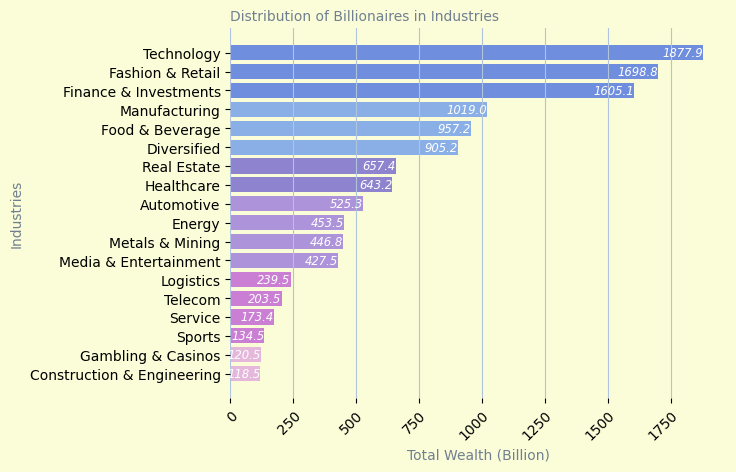

In [23]:
# Billionaires by industries --- bar chart
industries_df = full_df[['finalWorth','industries']].groupby('industries').sum()
industries_df = industries_df.sort_values(by = 'finalWorth', ascending = True)

colors = ['plum','plum','mediumorchid','mediumorchid','mediumorchid','mediumorchid',
          'mediumpurple','mediumpurple','mediumpurple','mediumpurple', 
          'slateblue','slateblue','cornflowerblue','cornflowerblue','cornflowerblue',
          'royalblue','royalblue','royalblue']

# Set background color of the outer
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

# Plot
plt.barh(industries_df.index, industries_df['finalWorth'], color = colors, alpha = 0.75, align = 'center')
plt.title("Distribution of Billionaires in Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion)", color = 'slategray',fontsize=10)
plt.ylabel("Industries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# annotate()
for index, value in enumerate(industries_df['finalWorth']):
    plt.text(value, index, str(value), ha = 'right', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'white') 
    
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('output/bar_industry.png')
plt.show()


## Wealth Range of Billionaires by Gender

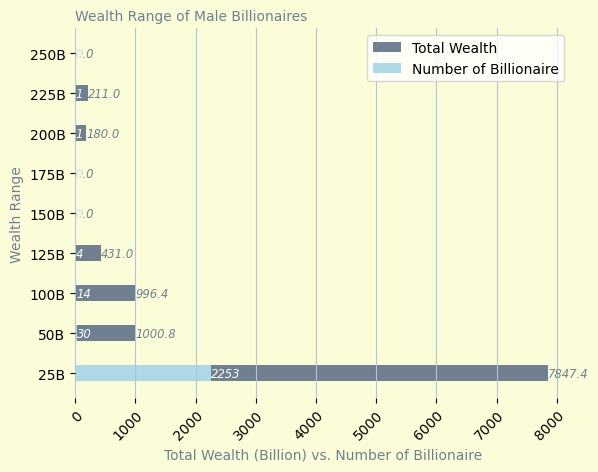

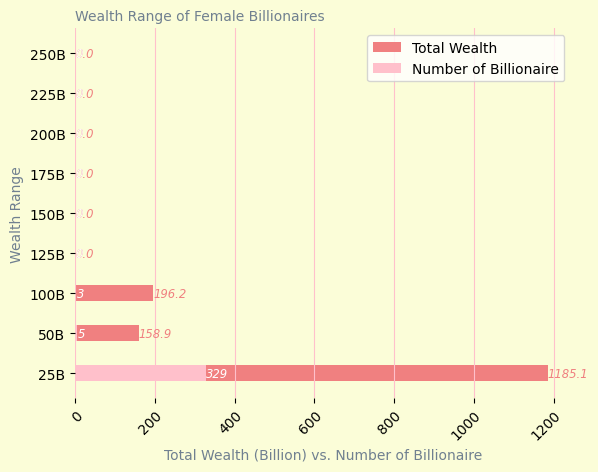

In [24]:
# Wealth range by gender 
# Female data
female_wealth_df = full_df[full_df['gender'] == 'F'][['finalWorth','rank']]
# Create bins
female_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
female_wealth_df["wealth_range"] = pd.cut(female_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)

# Aggregate sum and count in df
female_wealth_df = female_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count'])

# Male data
male_wealth_df = full_df[full_df['gender']=='M'][['finalWorth','rank']]
male_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
male_wealth_df["wealth_range"] = pd.cut(male_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)
# Aggregate sum and count in df
male_wealth_df = male_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count']) 

# Set background color of the outer
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.barh(male_wealth_df.index, male_wealth_df['sum'], 0.4, color = 'slategrey') 
plt.barh(male_wealth_df.index, male_wealth_df['count'], 0.4, color = 'lightblue') 

#male_wealth_df.plot.barh(color = ('slategrey','lightblue'), alpha = 0.75, align = 'center')
plt.title("Wealth Range of Male Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(male_wealth_df['sum']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'slategrey') 
# annotate for count
for index, value in enumerate(male_wealth_df['count']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'white') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()    
    
# Female barh plot  
x_axis = np.arange(len(female_wealth_df['sum'])) 

# Set background color of the outer
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.barh(female_wealth_df.index, female_wealth_df['sum'], 0.4, color = 'lightcoral') 
plt.barh(female_wealth_df.index, female_wealth_df['count'], 0.4, color = 'pink') 

#female_wealth_df.plot.barh(color = ('lightcoral','pink'), alpha = 0.75, align = 'center')

plt.title("Wealth Range of Female Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="pink", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(female_wealth_df['sum']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'lightcoral') 
# annotate for count
for index, value in enumerate(female_wealth_df['count']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'white') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()



## Age Distributions of Billionaires by Gender

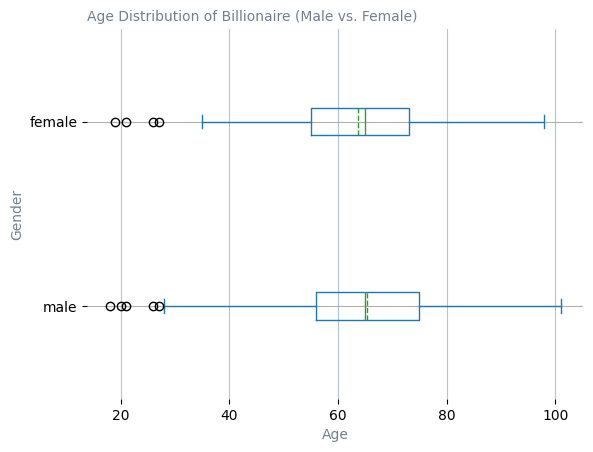

In [25]:
# Distribution of billionaires by gender and age
male_age = full_df[full_df['gender'] == 'M'][['finalWorth','age']].dropna()['age']
female_age = full_df[full_df['gender'] == 'F'][['finalWorth','age']].dropna()['age']
age = pd.DataFrame({'male':male_age, 
                    'female': female_age})

# Plot
age.plot(kind = 'box', vert = False, showmeans = True, meanline = True, grid = True)
plt.title('Age Distribution of Billionaire (Male vs. Female)',color = 'slategray',loc='left',fontsize=10)
plt.xlabel("Age", color = 'slategray',fontsize=10)
plt.ylabel("Gender", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')

# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

In [26]:
age['female'].median()

65.0

# Distribution of Billionaires in USA

## Billionaires in Top 20 US Cities

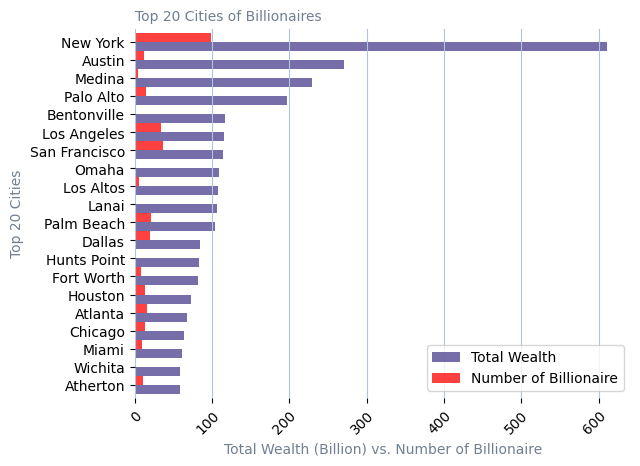

In [27]:
# Billionaires by USA cities --- bar chart
city_df = data_df[data_df['country']=='United States']
city_df = city_df[['rank','finalWorth','personName','city','industries', 'gender', 'age','selfMade']]

city_df.at[700,'city']='Pompano Beach'
city_df.at[1488,'city']='Boca Raton'
city_df.at[2213,'city']='Lone Pine'
city_df.at[2223,'city']='Virginia'

city_wealth_df = round(city_df[['finalWorth','city']].groupby('city').sum(),2)
city_count_df = city_df[['finalWorth','city']].groupby('city').count()
all_city_df = pd.merge(city_wealth_df, city_count_df, on = 'city', how = 'outer', suffixes = ('_value', '_count') )
all_city_df = all_city_df.sort_values(by = 'finalWorth_value', ascending = True)
top_city_df = all_city_df.tail(20)

# multi barh plot for top 20 cities 
# Set background color of the outer
# plt.figure(facecolor='#fbfdd8')
# ax = plt.axes()
# ax.set_facecolor('#fbfdd8')

# plt.barh(top_city_df.index, top_city_df['finalWorth_value'], 0.4, color = 'darkslateblue') 
# plt.barh(top_city_df.index, top_city_df['finalWorth_count'], 0.4, color = 'red') 
  
top_city_df.plot.barh(color = ('darkslateblue','red'), width = 1, alpha = 0.75, align = 'center')

plt.title("Top 20 Cities of Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Top 20 Cities", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))

# # annotate for total wealth
# for index, value in enumerate(top_city_df['finalWorth_value']):
#     plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'darkslateblue') 
# # annotate for count
# for index, value in enumerate(top_city_df['finalWorth_count']):
#     plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'red') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [28]:
# Create data frame for city coordinates search
coord_city_df = city_df.groupby('city').sum().reset_index()[['city','finalWorth']]
coord_city_df['Lon']=''
coord_city_df['Lat']=''

# Use API requests to draw cities distribution on USA map
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

# Loop through the coord_country_df DataFrame and search coordinates for each country
for index, row in coord_city_df.iterrows():

    # Get the country's name 
    city = row["city"] 

    # Add the current city to the parameters
    params["text"] = f"{city}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()
  
    # Extract latitude and longitude
    coord_city_df.loc[index, "Lat"] = response["results"][0]["lat"]
    coord_city_df.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {city} fetched...")

# Output city coordinates to csv file
coord_city_df.to_csv("output/city_coordinates.csv")

Coordinates for Abbeville fetched...
Coordinates for Adel fetched...
Coordinates for Afton fetched...
Coordinates for Alexandria fetched...
Coordinates for Alpine fetched...
Coordinates for Annapolis fetched...
Coordinates for Arcadia fetched...
Coordinates for Aspen fetched...
Coordinates for Atherton fetched...
Coordinates for Atlanta fetched...
Coordinates for Audubon fetched...
Coordinates for Austin fetched...
Coordinates for Aventura fetched...
Coordinates for Bal Harbour fetched...
Coordinates for Bedford fetched...
Coordinates for Belle Vernon fetched...
Coordinates for Belvedere fetched...
Coordinates for Bentonville fetched...
Coordinates for Berkeley fetched...
Coordinates for Bethesda fetched...
Coordinates for Beverly Hills fetched...
Coordinates for Bingham Farms fetched...
Coordinates for Birchwood fetched...
Coordinates for Birmingham fetched...
Coordinates for Bloomfield Hills fetched...
Coordinates for Bloomington fetched...
Coordinates for Boca Raton fetched...
Coord

Coordinates for San Diego fetched...
Coordinates for San Francisco fetched...
Coordinates for San Jose fetched...
Coordinates for San Juan Islands fetched...
Coordinates for San Marcos fetched...
Coordinates for Sands Point fetched...
Coordinates for Santa Barbara fetched...
Coordinates for Santa Clara fetched...
Coordinates for Santa Cruz fetched...
Coordinates for Santa Monica fetched...
Coordinates for Sarasota fetched...
Coordinates for Saratoga fetched...
Coordinates for Scarborough fetched...
Coordinates for Scarsdale fetched...
Coordinates for Scottsdale fetched...
Coordinates for Seattle fetched...
Coordinates for Sewickley fetched...
Coordinates for Short Hills fetched...
Coordinates for Sioux Falls fetched...
Coordinates for Southampton fetched...
Coordinates for Springdale fetched...
Coordinates for Springfield fetched...
Coordinates for St. John fetched...
Coordinates for St. Louis fetched...
Coordinates for St. Paul fetched...
Coordinates for St. Petersburg fetched...
Coor

In [30]:
# Read city coordinates from csv file
coord_city_df = pd.read_csv("output/city_coordinates.csv")

# Configure the map
map_plot_2 = coord_city_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriStreet",
    size = 'finalWorth',
    color = 'city',
    alpha = 0.5,
    frame_width = 800,
    frame_height = 600   
)

# Display the map plot
map_plot_2
hvplot.save(map_plot_2,'city_map.html')

## Billionaires in US Industries

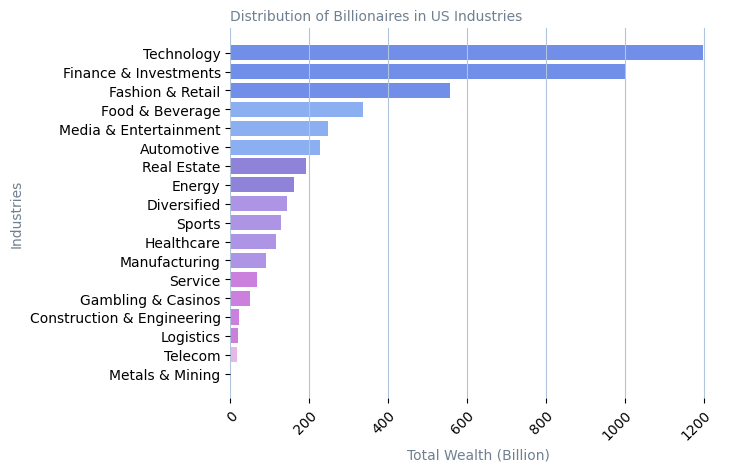

In [31]:
# Billionaires by industries --- bar chart
city_industries_df = city_df[['finalWorth','industries']].groupby('industries').sum()
city_industries_df = city_industries_df.sort_values(by = 'finalWorth', ascending = True)

colors = ['plum','plum','mediumorchid','mediumorchid','mediumorchid','mediumorchid',
          'mediumpurple','mediumpurple','mediumpurple','mediumpurple', 
          'slateblue','slateblue','cornflowerblue','cornflowerblue','cornflowerblue',
          'royalblue','royalblue','royalblue']

# Set background color
# plt.figure(facecolor='#fbfdd8')
# ax = plt.axes()
# ax.set_facecolor('#fbfdd8')

#Plot barh
plt.barh(city_industries_df.index, city_industries_df['finalWorth'], color = colors, alpha = 0.75, align = 'center')
plt.title("Distribution of Billionaires in US Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion)", color = 'slategray',fontsize=10)
plt.ylabel("Industries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# # annotate()
# for index, value in enumerate(city_industries_df['finalWorth']):
#     plt.text(value, index, str(value), ha = 'right', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'white') 
    
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

## Wealth Range of US Billionaires by Gender

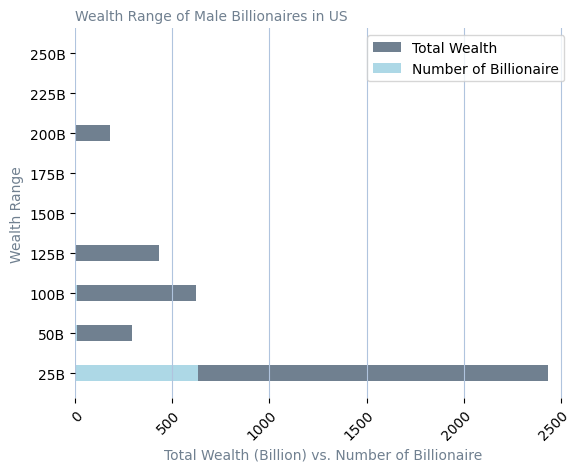

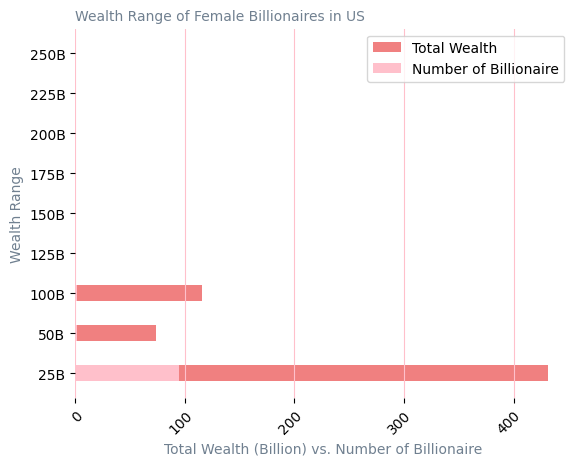

In [32]:
# Wealth range by gender 
# Female data
female_wealth_df = city_df[city_df['gender'] == 'F'][['finalWorth','rank']]
# Create bins
female_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
female_wealth_df["wealth_range"] = pd.cut(female_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)
# Aggregate sum and count in df
female_wealth_df = female_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count'])

# Male data
male_wealth_df = city_df[city_df['gender']=='M'][['finalWorth','rank']]
male_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
male_wealth_df["wealth_range"] = pd.cut(male_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)
# Aggregate sum and count in df
male_wealth_df = male_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count'])

# Male barh plot
# Set background color of the outer
# plt.figure(facecolor='#fbfdd8')
# ax = plt.axes()
# ax.set_facecolor('#fbfdd8')

plt.barh(male_wealth_df.index, male_wealth_df['sum'], 0.4, color = 'slategrey') 
plt.barh(male_wealth_df.index, male_wealth_df['count'], 0.4, color = 'lightblue') 


#male_wealth_df.plot.barh(color = ('slategrey','lightblue'), alpha = 0.75, align = 'center')
plt.title("Wealth Range of Male Billionaires in US", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# # annotate for total wealth
# for index, value in enumerate(male_wealth_df['sum']):
#     plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'slategrey') 
# # annotate for count
# for index, value in enumerate(male_wealth_df['count']):
#     plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'white') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()    
    
# Female barh plot 
# Set background color of the outer
# plt.figure(facecolor='#fbfdd8')
# ax = plt.axes()
# ax.set_facecolor('#fbfdd8')

plt.barh(female_wealth_df.index, female_wealth_df['sum'], 0.4, color = 'lightcoral') 
plt.barh(female_wealth_df.index, female_wealth_df['count'], 0.4, color = 'pink') 

#female_wealth_df.plot.barh(color = ('lightcoral','pink'), alpha = 0.75, align = 'center')

plt.title("Wealth Range of Female Billionaires in US", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="pink", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# # annotate for total wealth
# for index, value in enumerate(female_wealth_df['sum']):
#     plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'lightcoral') 
# # annotate for count
# for index, value in enumerate(female_wealth_df['count']):
#     plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
#              weight = 'medium', size = 'small', color = 'white') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

## Age Distributions of US Billionaires by Gender

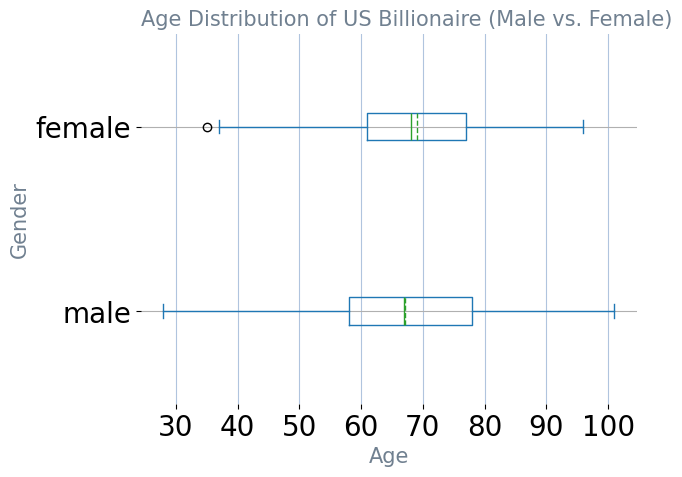

In [33]:
# Distribution of billionaires by gender and age
male_city_age = city_df[city_df['gender'] == 'M'][['finalWorth','age']].dropna()['age']
female_city_age = city_df[city_df['gender'] == 'F'][['finalWorth','age']].dropna()['age']
age = pd.DataFrame({'male':male_city_age, 
                    'female': female_city_age})
colors = ['steelblue','lightcoral']
age.plot(kind = 'box', vert = False, showmeans = True, meanline = True, grid = True, fontsize = 20)
plt.title('Age Distribution of US Billionaire (Male vs. Female)',color = 'slategray',loc='left',fontsize=15)
plt.xlabel("Age", color = 'slategray',fontsize=15)
plt.ylabel("Gender", color = 'slategray', fontsize=15)
plt.grid(c="lightsteelblue", axis = 'x')

# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

In [34]:
female_city_age.mean()

69.0

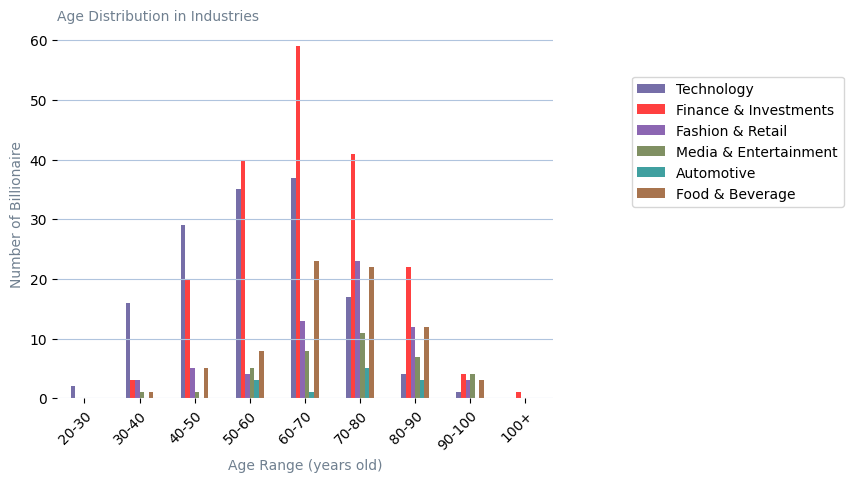

In [35]:
# Age distribution in Industry
age_industries_df = city_df[['age','industries','gender','finalWorth']]

# Create bins
age_industries_df['age_range']=''
bins = [0,20,30,40,50,60,70,80,90,100,110]
group_names = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100+']
age_industries_df["age_range"] = pd.cut(age_industries_df["age"], 
                                    bins, labels = group_names, include_lowest=True)

# Convert industries rows to columns
age_industries_df = age_industries_df[['age_range','industries']]
age_industries_df = pd.crosstab(age_industries_df.age_range, age_industries_df.industries)
age_industries_df_chosen = age_industries_df[['Technology','Finance & Investments','Fashion & Retail','Media & Entertainment','Automotive','Food & Beverage']]
# age vs. industries plot
colors = ['darkslateblue','red','rebeccapurple','darkolivegreen','teal','saddlebrown']
age_industries_df_chosen.plot.bar(color = colors, alpha = 0.75)
plt.title("Age Distribution in Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Age Range (years old)", color = 'slategray',fontsize=10)
plt.ylabel("Number of Billionaire", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'y')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(bbox_to_anchor=(1.6, 0.5), loc = 'lower right')


# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()    


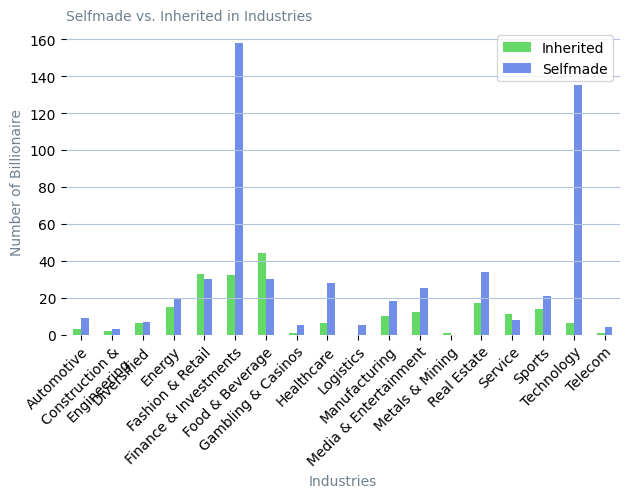

In [36]:
# US Selfmade billionaire vs. Inherited billionaire
selfmade_df = city_df[city_df['selfMade']==True][['finalWorth','gender','industries','age']]
inherited_df = city_df[city_df['selfMade']==False][['finalWorth','gender','industries','age']]
selfmade_df
# Selfmade distribution in Industry
selfmade_industries_df = city_df[['selfMade','industries','gender','finalWorth']]

# Convert industries rows to columns
selfmade_industries_df = selfmade_industries_df[['selfMade','industries']]
selfmade_industries_df = pd.crosstab(selfmade_industries_df.industries,selfmade_industries_df.selfMade)
selfmade_industries_df

# Selfmade vs. industries
colors = ['limegreen','royalblue']
selfmade_industries_df.plot.bar(color = colors, alpha = 0.75)
plt.title("Selfmade vs. Inherited in Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Industries", color = 'slategray',fontsize=10)
plt.ylabel("Number of Billionaire", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'y')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ['Inherited','Selfmade'], loc = 'upper right')

# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()    

In [37]:
selfmade_industries_df

selfMade,False,True
industries,,
Automotive,3,9
Construction & Engineering,2,3
Diversified,6,7
Energy,15,20
Fashion & Retail,33,30
Finance & Investments,32,158
Food & Beverage,44,30
Gambling & Casinos,1,5
Healthcare,6,28


# Correlation Analysis of Billionaires

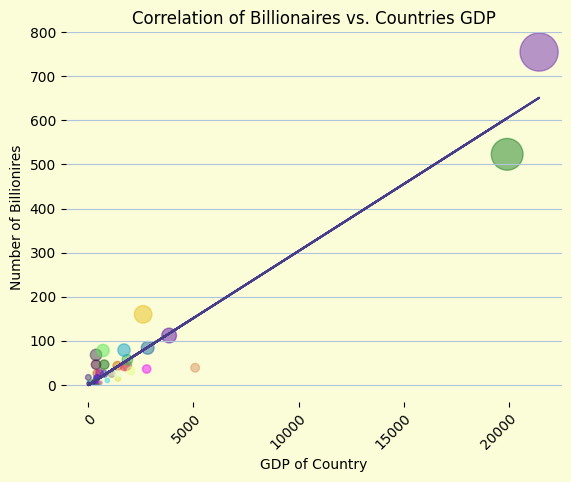

The correlation between GDP and Billionaires is [0.97]


In [38]:
# Billionaire vs. Countries GDP

# Sort Dataframe for graphs
country_df = full_df.groupby("country")
country_count = country_df.count()
country_unique = country_df['gdp_country'].unique()
# Calculate Linear Regression Model
corr=np.round(st.pearsonr(country_unique,country_count['finalWorth'])[0],2)
model = st.linregress(country_unique.astype(float),country_count['finalWorth'])

# Set background color
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

# Plot Line and Scatter
y_values = (country_unique) * model[0] + model[1]
colors = []
for x in range(len(country_unique)):
    colors.append(x)
number_of_colors = len(country_unique)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
plt.scatter(country_unique, country_count['finalWorth'], c = color, s = country_count['population_country'],alpha = 0.5)
plt.plot(country_unique, y_values, color="darkslateblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.ylim(top = 800)
plt.title("Correlation of Billionaires vs. Countries GDP")
plt.xlabel('GDP of Country')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between GDP and Billionaires is {corr}")

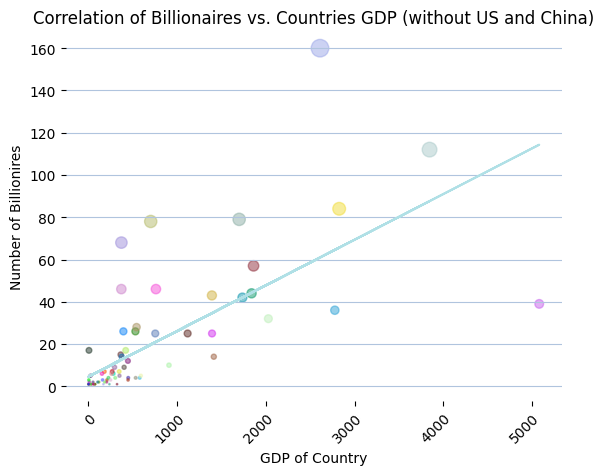

The correlation between GDP and Billionaires is [0.71]


In [39]:
# Billionaire vs. Countries GDP
# Remove US and China
test = country_count.drop('United States')
countryc_new = test.drop("China")
test_1 = country_unique.drop("United States")
countryu_new = test_1.drop("China")
# Calculate Model and r
corr=np.round(st.pearsonr(countryu_new,countryc_new['finalWorth'])[0],2)
model = st.linregress(countryu_new.astype(float),countryc_new['finalWorth'])
# Plot Scatter and Line
y_values = (countryu_new) * model[0] + model[1]
number_of_colors = len(countryu_new)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# # Set background color
# plt.figure(facecolor='#fbfdd8')
# ax = plt.axes()
# ax.set_facecolor('#fbfdd8')

plt.scatter(countryu_new, countryc_new['finalWorth'], c = color,s = countryc_new['population_country'],alpha=0.5)
plt.plot(countryu_new, y_values, color="powderblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.title('Correlation of Billionaires vs. Countries GDP (without US and China)')
plt.xlabel('GDP of Country')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between GDP and Billionaires is {corr}")

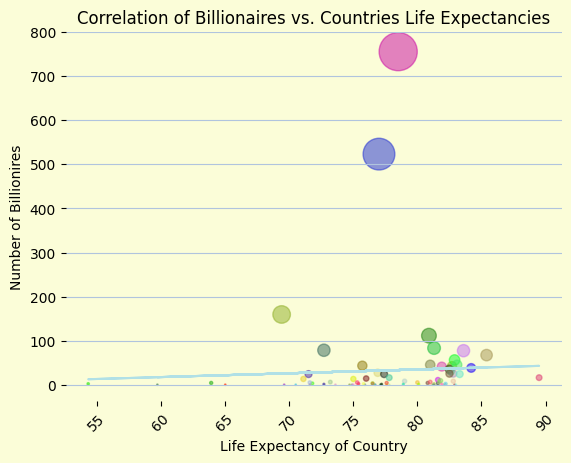

The correlation between Life Expectancy and Billionaires is [0.05]


In [40]:
# Billionaire vs. Countries Life Expectancies
# Sort Dataframe for graphs
country_df = full_df.groupby("country")
country_count = country_df.count()
country_unique = country_df['life_expectancy_country'].unique()
# Calculate Linear Regression Model
corr=np.round(st.pearsonr(country_unique,country_count['finalWorth'])[0],2)
model = st.linregress(country_unique.astype(float),country_count['finalWorth'])
# Plot Line and Scatter
y_values = (country_unique) * model[0] + model[1]
colors = []
for x in range(len(country_unique)):
    colors.append(x)
number_of_colors = len(country_unique)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Set background color
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.scatter(country_unique, country_count['finalWorth'], c = color, s = country_count['population_country'],alpha=0.5)
plt.plot(country_unique, y_values, color="powderblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.ylim(top = 800)
plt.title('Correlation of Billionaires vs. Countries Life Expectancies')
plt.xlabel('Life Expectancy of Country')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between Life Expectancy and Billionaires is {corr}")

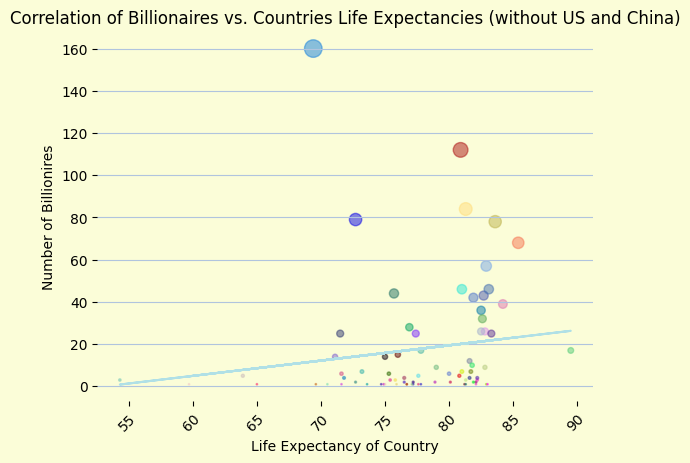

The correlation between Life Expectancy and Billionaires is [0.15]


In [41]:
# Billionaire vs. Countries Life Expectancies
# Remove US and China
test = country_count.drop('United States')
countryc_new = test.drop("China")
test_1 = country_unique.drop("United States")
countryu_new = test_1.drop("China")
# Calculate Model and r
corr=np.round(st.pearsonr(countryu_new,countryc_new['finalWorth'])[0],2)
model = st.linregress(countryu_new.astype(float),countryc_new['finalWorth'])
# Plot Scatter and Line
y_values = (countryu_new) * model[0] + model[1]
number_of_colors = len(countryu_new)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Set background color
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.scatter(countryu_new, countryc_new['finalWorth'], c = color,s = countryc_new['population_country'],alpha=0.5)
plt.plot(countryu_new, y_values, color="powderblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.title('Correlation of Billionaires vs. Countries Life Expectancies (without US and China)')
plt.xlabel('Life Expectancy of Country')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between Life Expectancy and Billionaires is {corr}")

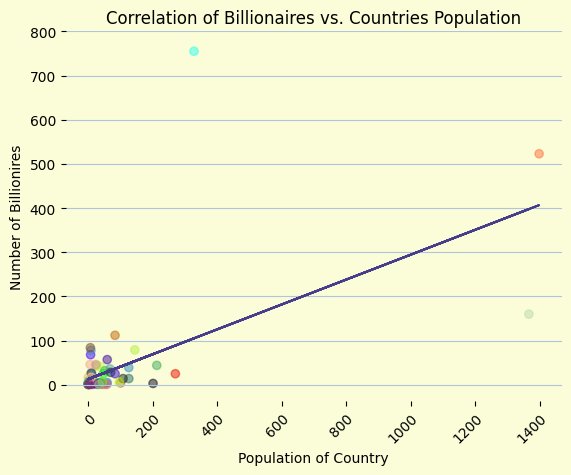

The correlation between Population and Billionaires is [0.6]


In [42]:
# Billionaires vs. Countries Population
country_df = full_df.groupby("country")
country_count = country_df.count()
country_unique = country_df['population_country'].unique()
country_unique
country_count.sort_values(by = 'finalWorth',ascending = False)
#Calculate Linear Regression Model
corr=np.round(st.pearsonr(country_unique,country_count['finalWorth'])[0],2)
model = st.linregress(country_unique.astype(float),country_count['finalWorth'])
# Plot Line and Scatter
y_values = (country_unique) * model[0] + model[1]
colors = []
for x in range(len(country_unique)):
    colors.append(x)
number_of_colors = len(country_unique)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Set background color
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.scatter(country_unique, country_count['finalWorth'], c = color,alpha=0.5)
plt.plot(country_unique, y_values, color="darkslateblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.ylim(top = 800)
plt.title('Correlation of Billionaires vs. Countries Population')
plt.xlabel('Population of Country')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between Population and Billionaires is {corr}")


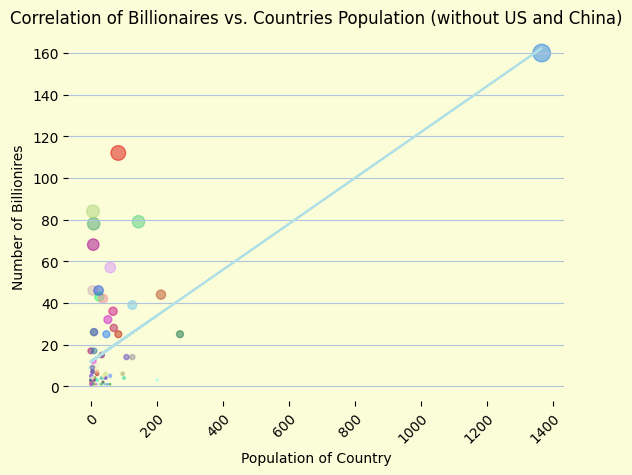

The correlation between Population and Billionaires is [0.62]


In [43]:
# Billionaires vs. Countries Population
# Remove US and China
test = country_count.drop('United States')
countryc_new = test.drop("China")
test_1 = country_unique.drop("United States")
countryu_new = test_1.drop("China")
# Calculate Model and r
corr=np.round(st.pearsonr(countryu_new,countryc_new['finalWorth'])[0],2)
model = st.linregress(countryu_new.astype(float),countryc_new['finalWorth'])
# Plot Scatter and Line
y_values = (countryu_new) * model[0] + model[1]
number_of_colors = len(countryu_new)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Set background color
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.scatter(countryu_new, countryc_new['finalWorth'], c = color,s = countryc_new['population_country'],alpha=0.5)
plt.plot(countryu_new, y_values, color="powderblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.title('Correlation of Billionaires vs. Countries Population (without US and China)')
plt.xlabel('Population of Country')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between Population and Billionaires is {corr}")

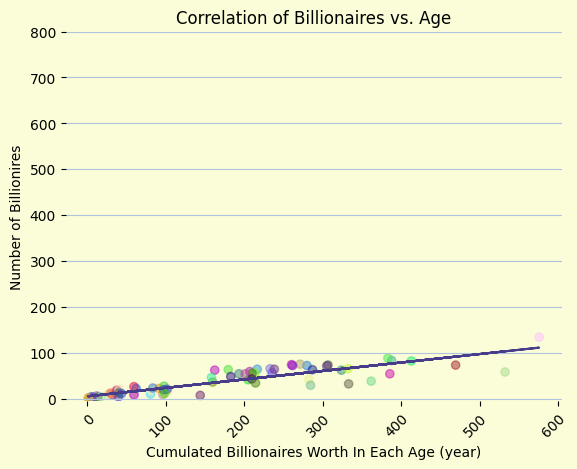

The correlation between Age and Billionaires is 0.89


In [46]:
# Billionaire vs. Age
corr_age = full_df.groupby("age")
age_count = corr_age.count() # Numbers of billionaires in each country
age_sum = corr_age['finalWorth'].sum() #Cummulated value of billionaires worth in each industry
age_sum

# Calculate Linear Regression Model
corr=np.round(st.pearsonr(age_sum,age_count['finalWorth'])[0],2)
model = st.linregress(age_sum.astype(float),age_count['finalWorth'])
# Plot Line and Scatter
y_values = (age_sum) * model[0] + model[1]
colors = []
for x in range(len(age_sum)):
    colors.append(x)
number_of_colors = len(age_sum)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Set background color
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.scatter(age_sum, age_count['finalWorth'], c = color,alpha=0.5)
plt.plot(age_sum, y_values, color="darkslateblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.ylim(top = 800)
plt.title('Correlation of Billionaires vs. Age')
plt.xlabel('Cumulated Billionaires Worth In Each Age (year)')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between Age and Billionaires is {corr}")

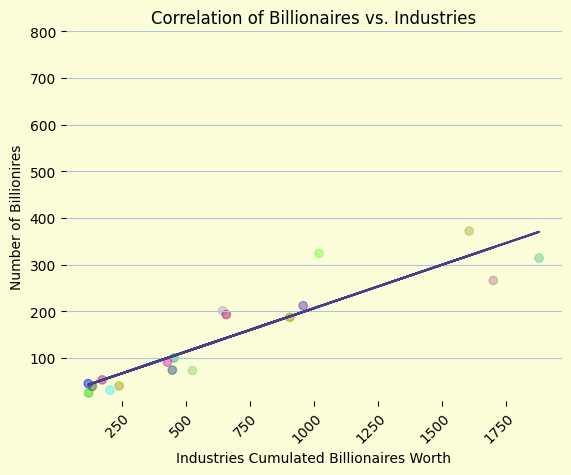

The correlation between Population and Billionaires is 0.92


In [47]:
# Billionaire vs. Industries
corr_industry = full_df.groupby("industries")
industries_count = corr_industry.count() # Numbers of billionaires in each country
industries_sum = corr_industry['finalWorth'].sum() #Cummulated value of billionaires worth in each industry
industries_sum

# Calculate Linear Regression Model
corr=np.round(st.pearsonr(industries_sum,industries_count['finalWorth'])[0],2)
model = st.linregress(industries_sum.astype(float),industries_count['finalWorth'])
# Plot Line and Scatter
y_values = (industries_sum) * model[0] + model[1]
colors = []
for x in range(len(industries_sum)):
    colors.append(x)
number_of_colors = len(industries_sum)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Set background color
plt.figure(facecolor='#fbfdd8')
ax = plt.axes()
ax.set_facecolor('#fbfdd8')

plt.scatter(industries_sum, industries_count['finalWorth'], c = color,alpha=0.5)
plt.plot(industries_sum, y_values, color="darkslateblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.ylim(top = 800)
plt.title('Correlation of Billionaires vs. Industries')
plt.xlabel('Industries Cumulated Billionaires Worth')
plt.ylabel('Number of Billionires')
plt.show()
print(f"The correlation between Population and Billionaires is {corr}")

# Bonus: The chances of you becoming a billionaire

In [48]:
# We are only interested in selfmade billionaire for this part
# What would your worth be if you were a billionaire?
# What are the chances of you becoming a billionaire?
# Y = billionaire/countries population %
# X = country_gdp + life_expectancy + population_country + 
#     education + gender + age + industries
# country_gdp: enter country name, search for corresponding gdp as input

# Select relevant columns (x variables)
worth_df = full_df[full_df['selfMade'] == True][['personName','gdp_country','life_expectancy_country','population_country','gross_tertiary_education_enrollment','gross_primary_education_enrollment_country','gender','age','industries','finalWorth']]
worth_df.reset_index(drop = True)

# Create dummy variables for gender
for index, row in worth_df.iterrows():
    if (row['gender'] == 'M'):
        worth_df['gender'] = 1
    else: worth_df['gender'] = 0

# Create numerical variable for industries
dummy_industries = full_df.groupby('industries').sum().reset_index()[['industries','finalWorth']]
# dummy_industries['industries']
dummy_industries['finalWorth'].values
dummy = {'industries': ['Automotive','Construction & Engineering','Diversified',
                             'Energy','Fashion & Retail','Finance & Investments','Food & Beverage',
                             'Gambling & Casinos','Healthcare','Logistics','Manufacturing','Media & Entertainment',
                             'Metals & Mining','Real Estate','Service','Sports','Technology','Telecom'],
         'finalWorth': [ 525.3,  118.5,  905.2,  453.5, 1698.8, 1605.1,  957.2,  120.5,
                         643.2,  239.5, 1019. ,  427.5,  446.8,  657.4,  173.4,  134.5,
                         1877.9,  203.5]}
# fill in industries with dummy variables
counter = 0
for i in dummy['industries']:
    for index, row in worth_df.iterrows():
        if (row['industries'] == i):
            worth_df.at[index,'industries'] = dummy['finalWorth'][counter]
    counter = counter + 1

# Build the multi-linear regression model

# Define X and y variables
X = worth_df[['gdp_country', 'population_country','gross_tertiary_education_enrollment','gross_primary_education_enrollment_country','gender','age','industries']]
y = worth_df['finalWorth']
# Fit in linear regression model
regr = linear_model.LinearRegression()
regr.fit(X,y)


LinearRegression()

# How much would you worth, if you were a billionaire?

# Let's predict !!!

In [ ]:
# Input question for x variables
gdp = input("Please input a value for your country's GDP (billion)")
# life = input("Please enter a number for your life expectancy (year)")
population = input("Please enter a number for your country's population (million)")
# education = input("Have you been accepted to University? (yes/no)")
gender = input("Please enter your gender (male/female)")
age = input("Please enter your age")
industry = input(f"Please enter the industry name that you would be working in? {dummy['industries']}")
#usa gdp 23320 b
#    pop. 331 m
#china gdp 17730
#    pop. 1412
#India gdp 3176
#    pop. 1408

In [ ]:
# Conversion to dummy variables
# Convert gender to binary value
if gender == 'male':
    gender_dummy = 1
else: gender_dummy = 0
# Convert industry to dummy value    
industry_dummy = dummy_industries[dummy_industries['industries'] == industry].iloc[0,1]
# Convert the rest of input value to numeric
gdp = int(gdp)
#life = int(life)
population = int(population)
age = int(age)

In [ ]:
# Predict your worth when becoming a billionaire
# gdp, life, population, tertiary education, primary education, gender, age, industries
predictWorth = regr.predict([[gdp, population, 100, 100, gender_dummy, age, industry_dummy]])
print(f"***********************************************\n\nIf you were a billionare... ... ... ... \n\nYou will be worth {round(predictWorth[0],2)} billion US dollars !!!\n\n************************************************")